In [1]:
from specialist_data import *
from graph_utils import *
from models.stats.context_stats import ContextStats

seeds = [i+1 for i in range(8)]

stats = ContextStats('../../data/xdpole', seeds)

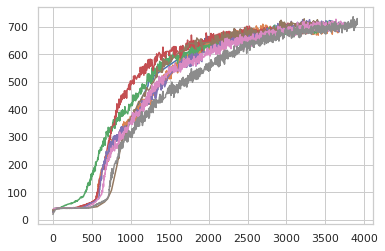

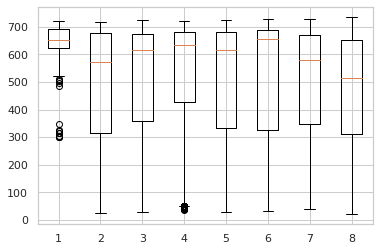

In [2]:
stats.fitness_evolution()
stats.fitness_boxplot()